In [220]:
from google.colab import files
import io
import pandas as pd
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['1001.csv']))

Saving 1001.csv to 1001 (1).csv


RangeIndex(start=0, stop=659, step=1)

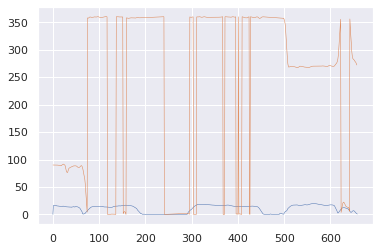

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size

data.set_index("time_seconds")
data['speed_meters_per_second'].plot(linewidth=0.5)
data['heading_degrees'].plot(linewidth=0.5)
data.index


In [261]:

import math
def count_turns_stops(df):
  try:
    deg=45
    bins=10
    df["present"]=df["heading_degrees"]
    df=df.apply(pd.to_numeric)
    df.fillna(0,inplace=True)
    df=df[list(df.columns)].astype(int)
    # Considering every event within 3 seconds to be same - taking (3)average and selecting every 3rd row
    df=df.rolling(bins).mean() 
    df = df.iloc[::bins, :]
    df=df.apply(pd.to_numeric)
    df.fillna(0,inplace=True)
    df=df[list(df.columns)].astype(int)
    # Considering every event within 3 seconds to be same
    df.fillna(0,inplace=True)
    #Left & right turns
    df['turn_count'] = ((df.present.shift(1) - df.present).abs() > deg) &  (df.present.shift(-1) == df.present)
    df['turn_count']|=((df.present.shift(-1) - df.present).abs() > deg) &  (df.present.shift(1) == df.present) 
    #peak turns
    df['turn_count']|=((df.present.shift(-1) - df.present).abs() > deg) &  ((df.present.shift(1) - df.present).abs() >deg)
    #count_stops
    df["stop_count"]=(df.speed_meters_per_second.shift(-1) == df.speed_meters_per_second) &  (df.speed_meters_per_second.shift(1) == df.speed_meters_per_second)
    #df.to_csv("f.csv")
    #files.download("f.csv")
    return len(df[df.turn_count==True]),len(df[df.speed_meters_per_second==True]),df
  except Exception as e:
    print(e)
    return 0,0,None
  
nturns,nstops,data2=count_turns_stops(data)
print(nturns,nstops)


22 1


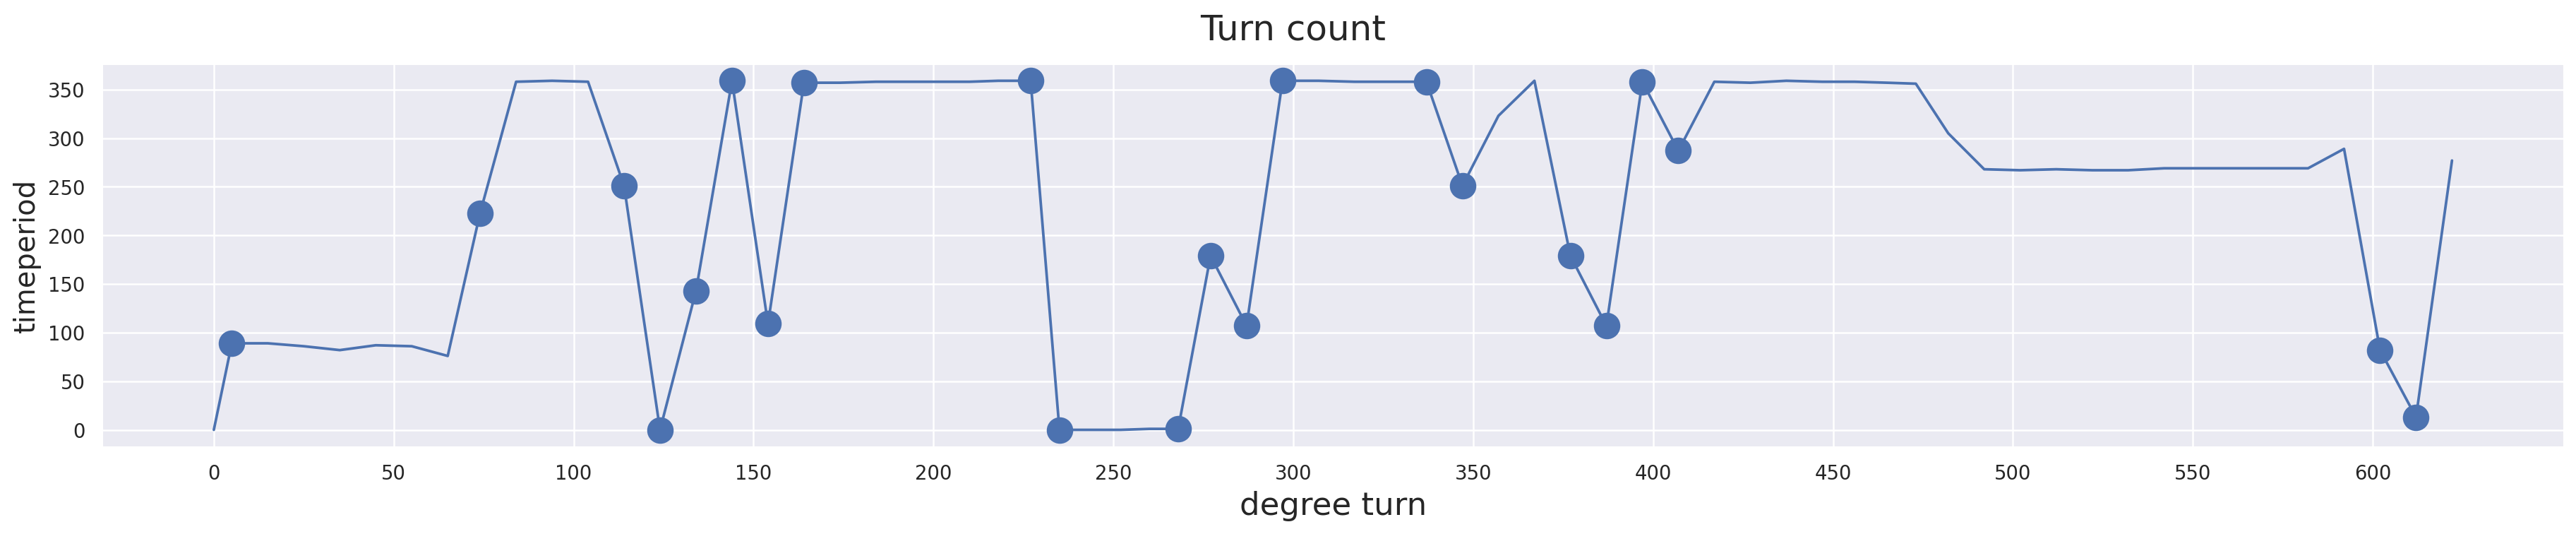

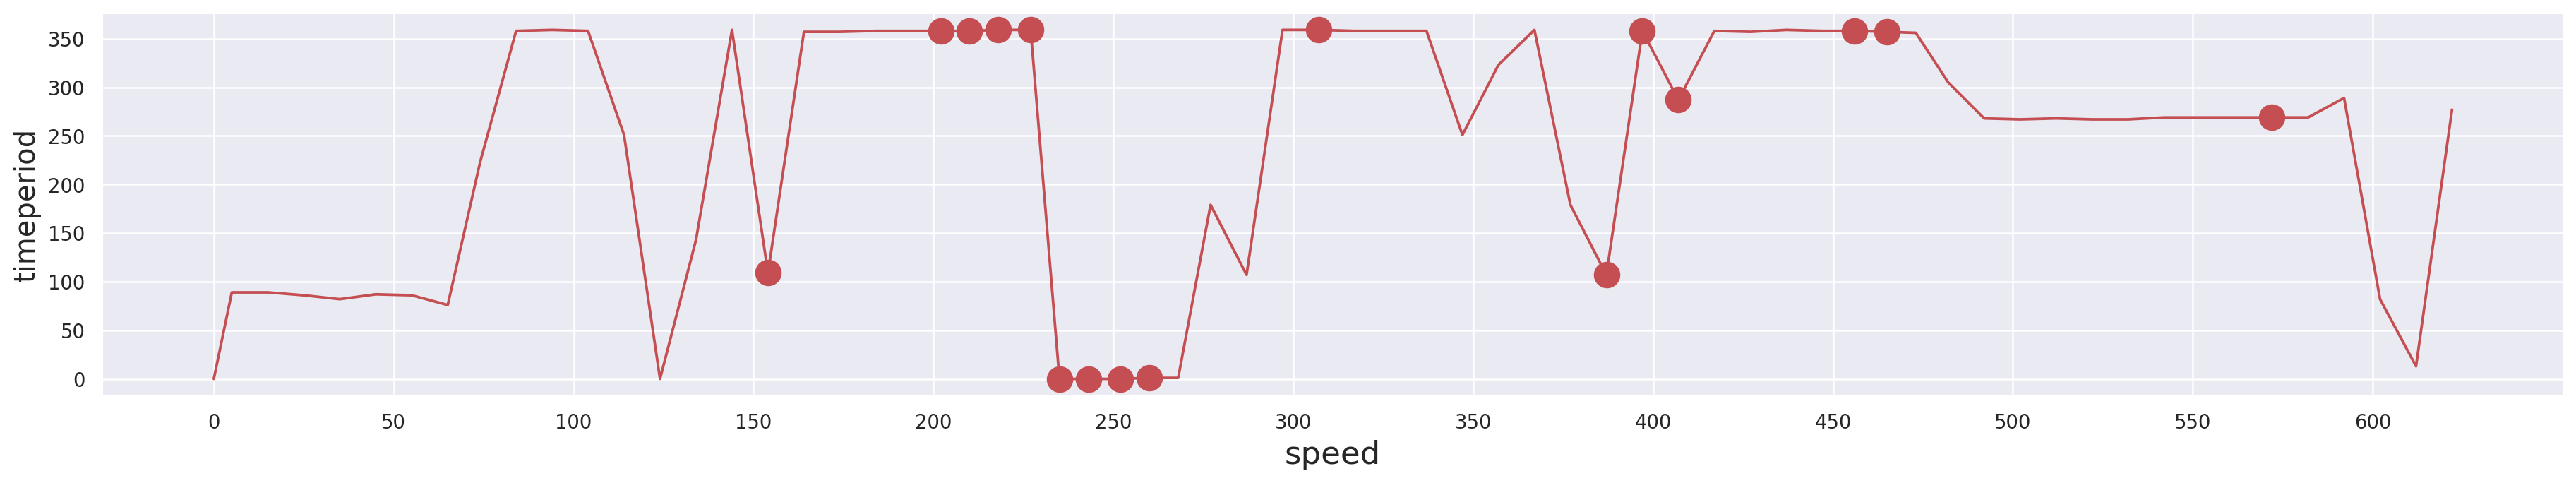

In [269]:
import numpy as np
from matplotlib.pyplot import figure

markers_on = list(data2["turn_count"].values)
fig = plt.figure(num=None, figsize=(25, 4), dpi=180, facecolor='w', edgecolor='k')
fig.suptitle('Turn count', fontsize=20)
plt.xlabel('degree turn', fontsize=18)
plt.ylabel('timeperiod', fontsize=16)
plt.xticks(np.arange(min(data2['time_seconds']), max(data2['time_seconds'])+1, 50.0))
plt.plot(data2['time_seconds'],data2['heading_degrees'],markevery=markers_on, ls='-', ms=14, marker='o')
plt.show()

markers_on2 = list(data2["stop_count"].values)
figure(num=None, figsize=(25, 4), dpi=180, facecolor='w', edgecolor='k')
fig.suptitle('Stop count', fontsize=20)
plt.xlabel('speed', fontsize=18)
plt.ylabel('timeperiod', fontsize=16)
plt.xticks(np.arange(min(data2['time_seconds']), max(data2['time_seconds'])+1, 50.0))
plt.plot(data2['time_seconds'],data2['heading_degrees'],markevery=markers_on2, ls='-', ms=14, marker='o',color='r')
plt.show()